<a href="https://colab.research.google.com/github/sudarmintosenlau/Facemask-Detection/blob/main/Image_Classification_Model_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INFORMASI DIRI**

**Sudarminto Senlau**

![an image](https://img.icons8.com/material-two-tone/2x/incoming-call.png)
**085739022843**

![an image](https://img.icons8.com/fluent-systems-regular/2x/gmail.png)
**sudarmintosenlau37@gmail.com**

![an image](https://img.icons8.com/material-rounded/2x/address.png)
**Kupang, Nusa Tenggara Timur**

![an image](https://img.icons8.com/fluent-systems-filled/2x/linkedin.png)
[Linkedin](https://www.linkedin.com/in/sudarminto-senlau/)

### Submission at Dicoding
#### Klasifikasi Gambar

Membuat program Mendeteksi Seseorang menggunakan masker dan tidak menggunakan masker

Import Dataset from Kaggle API

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "sudarmintosenlau"
os.environ['KAGGLE_KEY'] = "d877e312b36de616fddd0ac7c3aa5e03"

In [ ]:
#API dataset from kaggle
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 320M/330M [00:02<00:00, 155MB/s]
100% 330M/330M [00:02<00:00, 158MB/s]


In [ ]:
!unzip -q face-mask-12k-images-dataset.zip -d .

In [ ]:
import zipfile                                                # Mengimpor modul 'zipfile' dan 'os' untuk membaca file zip dan mengakses folder data

local_zip = 'face-mask-12k-images-dataset.zip'                # mendefinikan variabel yang akan diekstrack
zip_ref = zipfile.ZipFile(local_zip, 'r')

In [ ]:
base_dir = 'Face Mask Dataset/Train'                          # Menyiapkan Direktori 
os.listdir(base_dir)

['WithoutMask', 'WithMask']

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,                # Menormalisasi Data
                                  rotation_range = 20,              # memprediksi rotasi gambar hingga 20 derajat
                                  horizontal_flip = True,           # memprediksi gambar diputar balik secara horizontal
                                  shear_range = 0.2,                # memprediksi pemangkasan gambar hingga 0.2 dari ukuran awal
                                  fill_mode = 'wrap',               # memprediksi lalu mengisi pixel yang tidak ada dari data pixel yang ada
                                  validation_split = 0.4)           # Membagi data training menjadi 60% dan data validasi 40%
test_datagen = ImageDataGenerator(rescale=1./255,
                                  zoom_range = 0.2,
                                  shear_range = 0.2,
                                  horizontal_flip = True,
                                  validation_split = 0.4)

In [ ]:
train_generator = train_datagen.flow_from_directory(base_dir,
                                                    target_size = (150, 100),
                                                    shuffle = True,
                                                    subset = 'training',
                                                    class_mode = 'categorical')

validation_generator = train_datagen.flow_from_directory(base_dir,
                                                        target_size = (150, 100),
                                                        subset = 'validation',
                                                        class_mode = 'categorical')

Found 6000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


Dari ukuran pembagian data validasi 40% dari total dataset, ditemukan: Data training memiliki 6000 sampel gambar dengan 2 class, dan Data validasi memiliki 4000 sampel gambar dengan 2 class.

Setelah data kita telah siap, kita bisa membangun arsitektur sebuah CNN.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Activation, Conv2D,MaxPooling2D, Flatten, MaxPool2D, Dense, BatchNormalization

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 100, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(128, (3, 3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Conv2D(512, (3, 3), activation= 'relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation= 'relu'),
                                    tf.keras.layers.Dense(2, activation= 'softmax')
])

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(), 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 98, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 8, 512)        5

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = 10,
                    epochs = 10,
                    validation_data = validation_generator,
                    validation_steps = 5,
                    callbacks=[checkpoint],
                    verbose = 2
)

Epoch 1/10
10/10 - 17s - loss: 0.6053 - accuracy: 0.6875 - val_loss: 0.3553 - val_accuracy: 0.8813
Epoch 2/10
10/10 - 15s - loss: 0.3923 - accuracy: 0.8719 - val_loss: 0.4233 - val_accuracy: 0.8188
Epoch 3/10
10/10 - 15s - loss: 0.3041 - accuracy: 0.8875 - val_loss: 0.6512 - val_accuracy: 0.6938
Epoch 4/10
10/10 - 15s - loss: 0.2948 - accuracy: 0.8938 - val_loss: 0.2511 - val_accuracy: 0.9187
Epoch 5/10
10/10 - 15s - loss: 0.2232 - accuracy: 0.9219 - val_loss: 0.2269 - val_accuracy: 0.9062
Epoch 6/10
10/10 - 15s - loss: 0.2517 - accuracy: 0.9219 - val_loss: 0.2277 - val_accuracy: 0.9312
Epoch 7/10
10/10 - 15s - loss: 0.2414 - accuracy: 0.9250 - val_loss: 0.2227 - val_accuracy: 0.9000
Epoch 8/10
10/10 - 15s - loss: 0.1768 - accuracy: 0.9469 - val_loss: 0.1273 - val_accuracy: 0.9625
Epoch 9/10
10/10 - 15s - loss: 0.1209 - accuracy: 0.9563 - val_loss: 0.1469 - val_accuracy: 0.9563
Epoch 10/10
10/10 - 15s - loss: 0.1910 - accuracy: 0.9281 - val_loss: 0.2129 - val_accuracy: 0.9250


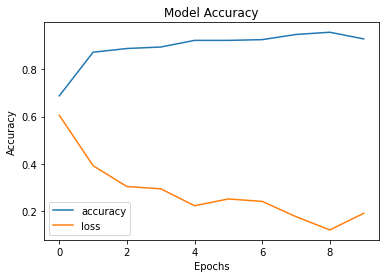

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'loss'])
plt.show()

Menyimpan model kedalam format TF-Lite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpitrl2j_y/assets
